# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style()

In [31]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

## Практика. Сделайте cross_val_score для KNN

## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

## Практика. Подберите оптимальное количество соседей на основе cross_val_score

## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [40]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)
knn = KNeighborsClassifier()

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [41]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [42]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0006672143936157227
std_fit_time : 0.00020187804399119326
mean_score_time : 0.0020124435424804686
std_score_time : 0.0005598617832168204
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.053333333333333316
rank_test_score : 24
split0_train_score : 1.0
split1_train_score : 1.0
split2_train_score : 1.0
split3_train_score : 1.0
split4_train_score : 1.0
split5_train_score : 1.0
split6_train_score : 1.0
split7_train_score : 1.0
split8_train_score : 1.0
split9_train_score : 1.0
mean_train_score : 1.0
std_train_score : 0.0


/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/truv/anaconda3/lib/python3.7/si

In [44]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

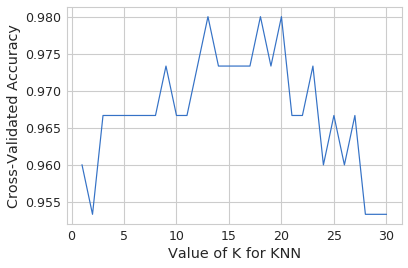

In [45]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [46]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


## Практика. Постройте confusion_matrix для лучшего estimator'а

## Конец практики

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно

## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [47]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [50]:
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [51]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [52]:
from sklearn.datasets import load_digits

In [53]:
data = load_digits()

In [54]:
X, y = data['data'], data['target']

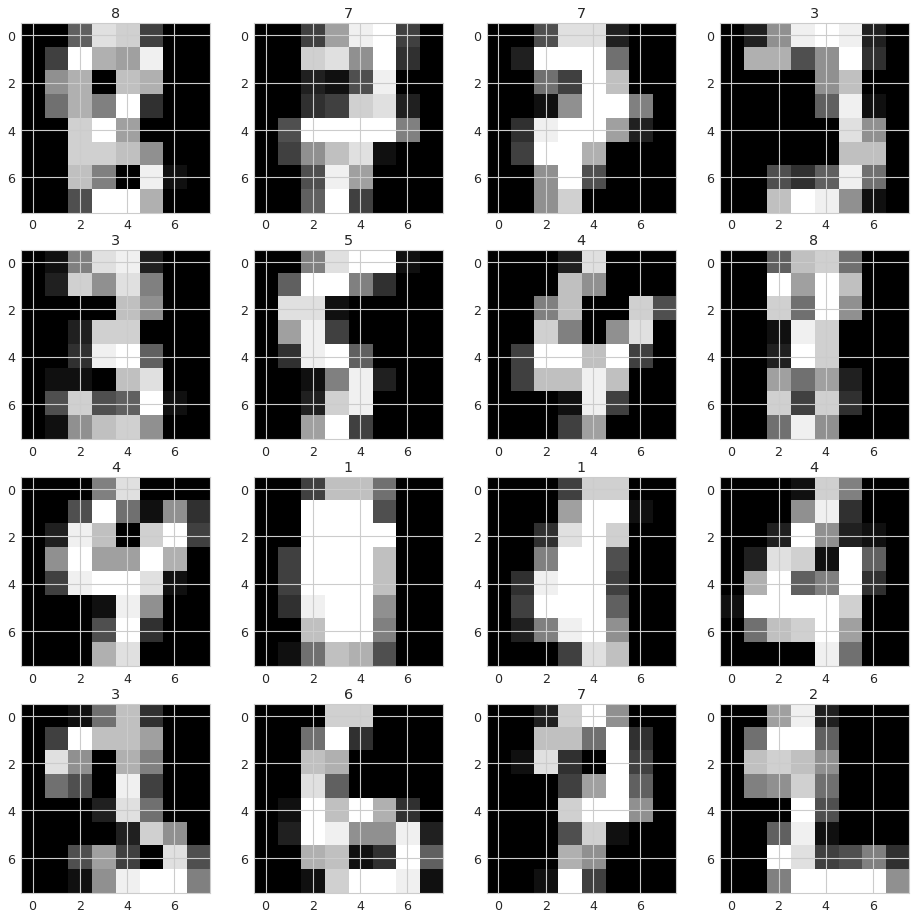

In [55]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()


In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

Возьмем слуайный лес, логистическую регрессию, kmeans, бэггинг, svm

In [59]:
import numpy as np

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
np.random.seed(0)

In [82]:
clf = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)
logreg = LogisticRegression()
svc = SVC()
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, max_features = 0.5)
km = KNeighborsClassifier()

In [100]:
C = [0.1,0.01,0.001,1,10,100]
penalty = ['l1', 'l2']
k = [2,3,4,5,6,7,8,9]
n_estimators = range(15,25)
max_depth = [5,6,7,8,9]
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']

In [107]:
parameters_logreg = dict(C = C, penalty = penalty)
parameters_bag = {
    'base_estimator__max_depth' : max_depth,
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}
parameters_km = dict(n_neighbors= k)
parameters_svc = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75),'gamma': (1,2,3,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}

In [102]:
def run_model(model,parameter,X_train, y_train,X_valid, y_valid):
    grid = RandomizedSearchCV(model,param_distributions=parameter)
    grid.fit(X_train, y_train)
    estimator = grid.best_estimator_
    print(accuracy_score(estimator.predict(X_valid),y_valid))

In [103]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [96]:
run_model(logreg,parameters_logreg,X_train, y_train,X_valid, y_valid)

/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9722222222222222


In [91]:
run_model(svc,parameters_svc,X_train, y_train,X_valid, y_valid)

0.9833333333333333


In [108]:
run_model(bag,parameters_bag,X_train, y_train,X_valid, y_valid)

0.975


In [104]:
run_model(km,parameters_km,X_train, y_train,X_valid, y_valid)

/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.9722222222222222


In [70]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
grid_clf = RandomizedSearchCV(clf, param_distributions = dict(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features,criterion=criterion), cv=5, scoring='accuracy')

In [72]:
grid_clf.fit(X_train, y_train)

/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/truv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value enco

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': range(15, 25), 'max_depth': [5, 6, 7, 8, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [73]:
clf_best = grid_clf.best_estimator_

In [75]:
clf_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(clf_best.predict(X_valid),y_valid)

0.9638888888888889

# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)